In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
from data_utils import *

In [14]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
raw_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


🧼 [결측치 비율 확인]

 - Age: 8.4% △ 주의

📊 [숫자형 변수 이상값 리포트]

📌 Daily Time Spent on Site
 - Median: 68.22
 - Max: 91.43 / Min: 32.60
 - Mean ± 3*Std: [17.44, 112.56]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [10.58, 119.33]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



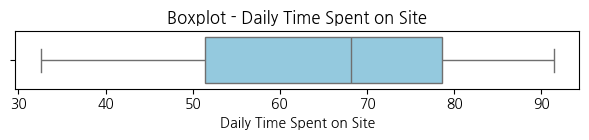

📌 Age
 - Median: 35.00
 - Max: 61.00 / Min: 19.00
 - Mean ± 3*Std: [9.07, 63.18]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [9.50, 61.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



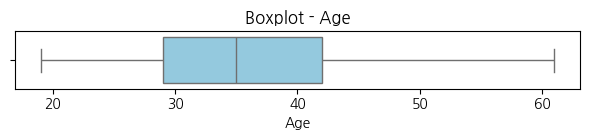

📌 Area Income
 - Median: 57012.30
 - Max: 79484.80 / Min: 13996.50
 - Mean ± 3*Std: [14756.10, 95243.90]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 3건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [19373.55, 93128.88]
 - IQR 기준 이상값: 9건
   → 🚨 이상값 의심됨 (IQR 기준)



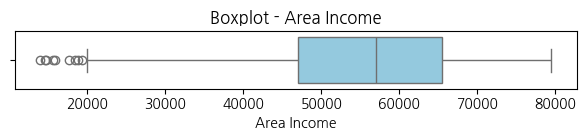

📌 Daily Internet Usage
 - Median: 183.13
 - Max: 269.96 / Min: 104.78
 - Mean ± 3*Std: [48.29, 311.71]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [18.89, 338.74]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



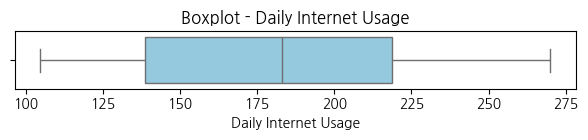

📌 Male
 - Median: 0.00
 - Max: 1.00 / Min: 0.00
 - Mean ± 3*Std: [-1.02, 1.98]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-1.50, 2.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



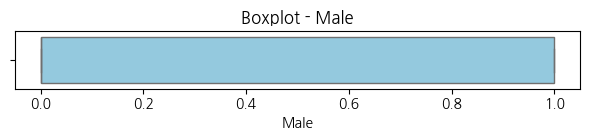

📌 Clicked on Ad
 - Median: 0.50
 - Max: 1.00 / Min: 0.00
 - Mean ± 3*Std: [-1.00, 2.00]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-1.50, 2.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



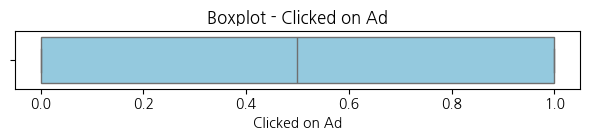


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - Ad Topic Line: 희귀값 1000개 (100.0%) → ⚠️ 희귀 범주 존재
 - City: 희귀값 1000개 (100.0%) → ⚠️ 희귀 범주 존재
 - Country: 희귀값 1000개 (100.0%) → ⚠️ 희귀 범주 존재
 - Timestamp: 희귀값 1000개 (100.0%) → ⚠️ 희귀 범주 존재


In [4]:
detailed_outlier_report(raw_data)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [6]:
raw_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
raw_data[raw_data['Age'].isna()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
6,88.91,NaN,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
18,54.70,NaN,31087.54,118.39,Grass-roots solution-oriented conglomeration,Jessicastad,1,British Indian Ocean Territory (Chagos Archipe...,2/13/2016 7:53,1
30,67.64,NaN,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,7/2/2016 20:23,0
55,80.60,NaN,67479.62,177.55,Sharable bottom-line solution,Thomasview,0,Croatia,4/7/2016 3:56,0
...,...,...,...,...,...,...,...,...,...,...
931,61.76,NaN,33553.90,114.69,Open-source local approach,Edwardsport,0,Jamaica,5/27/2016 8:53,1
932,63.30,NaN,63071.34,116.19,Polarized intangible encoding,Lake Evantown,0,Saint Barthelemy,5/9/2016 7:13,1
958,79.83,NaN,55764.43,234.23,Innovative regional groupware,North Frankstad,1,Sudan,5/18/2016 19:33,0
959,85.35,NaN,64235.51,161.42,Exclusive multi-state Internet solution,Claytonside,1,Ecuador,2/17/2016 11:15,0


In [18]:
raw_data['Age'] = raw_data['Age'].fillna(raw_data['Age'].mean())

In [19]:
raw_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [13]:
for col in raw_data.columns:
    print('='*25, col, '='*25)
    print(raw_data[col].value_counts())

========================= Daily Time Spent on Site =========================
Daily Time Spent on Site
84.53    3
77.05    3
62.26    3
75.55    3
78.76    3
        ..
72.97    1
51.30    1
51.63    1
55.55    1
77.35    1
Name: count, Length: 900, dtype: int64
========================= Age =========================
Age
36.128821    84
31.000000    53
28.000000    45
29.000000    42
36.000000    40
33.000000    37
26.000000    37
30.000000    35
34.000000    35
32.000000    35
40.000000    34
35.000000    33
27.000000    33
37.000000    32
41.000000    29
45.000000    29
38.000000    28
25.000000    27
39.000000    26
42.000000    25
43.000000    21
50.000000    20
23.000000    19
24.000000    19
44.000000    19
46.000000    18
49.000000    17
48.000000    15
52.000000    15
47.000000    13
51.000000    12
22.000000    11
53.000000    10
54.000000     9
55.000000     7
20.000000     6
57.000000     6
19.000000     6
21.000000     5
60.000000     4
58.000000     4
56.000000     2
59.000

<Axes: xlabel='Age', ylabel='Count'>

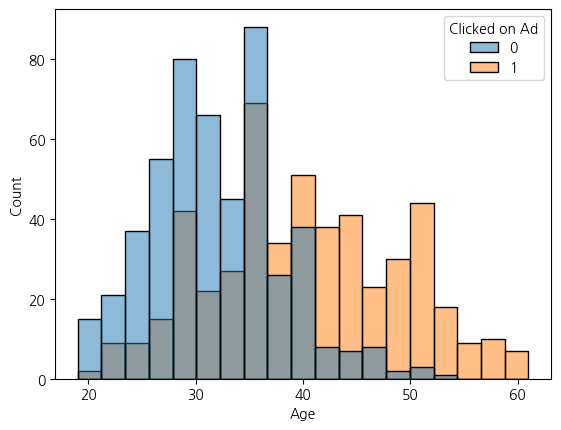

In [29]:
sns.histplot(x='Age', hue='Clicked on Ad', data=data)

<Axes: >

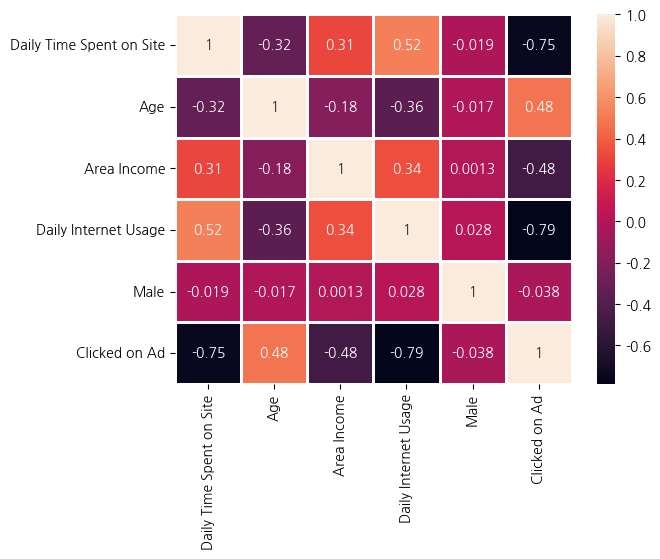

In [21]:
sns.heatmap(raw_data.select_dtypes(include='number').corr(), annot=True, linewidths=1)

## Feature engineering
* Ad Topic Line, city 삭제
* country는 label encoding
* Timestamp 처리하기

In [22]:
raw_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [30]:
data = raw_data.drop(['Ad Topic Line', 'City', 'Timestamp'], axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

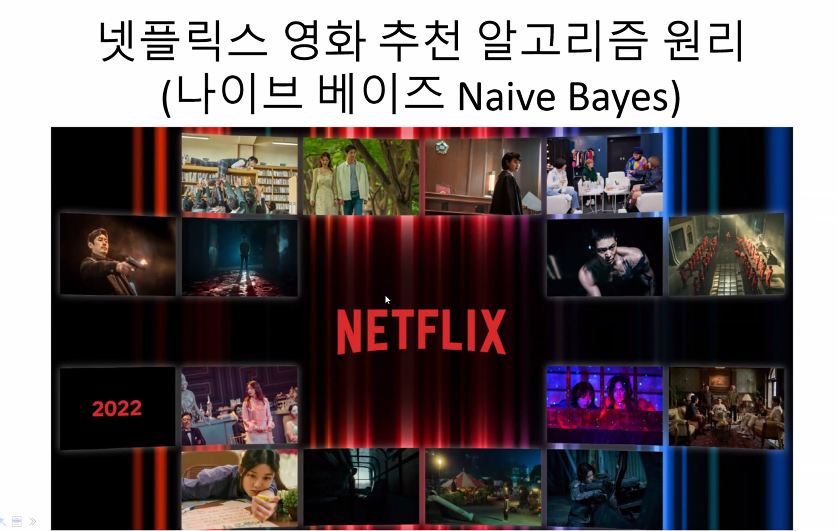

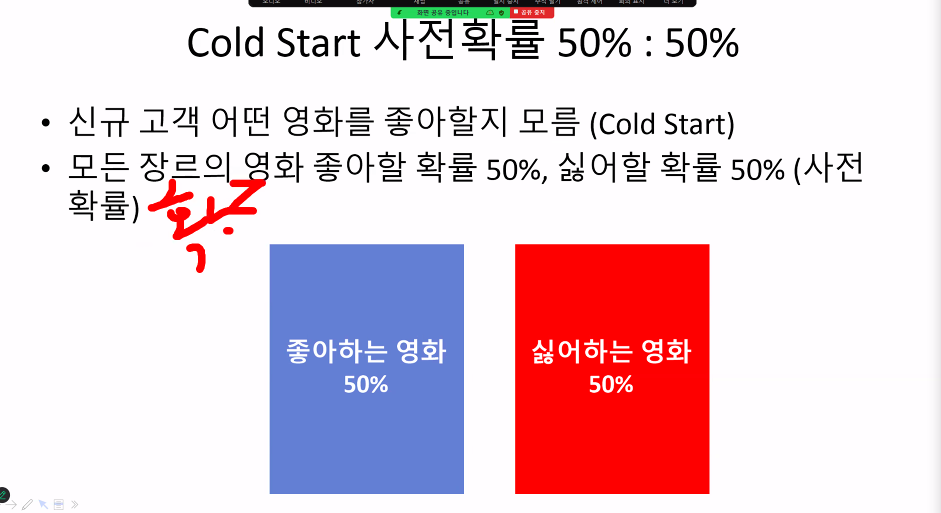

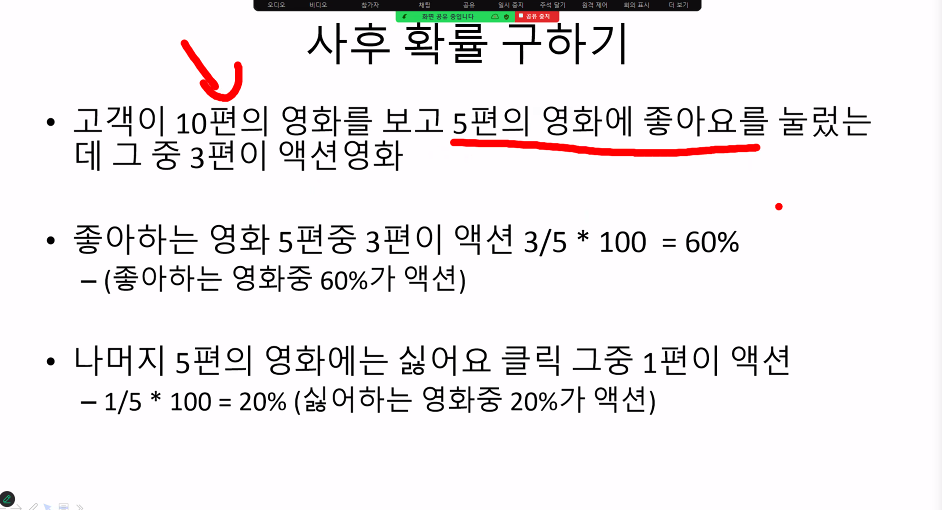

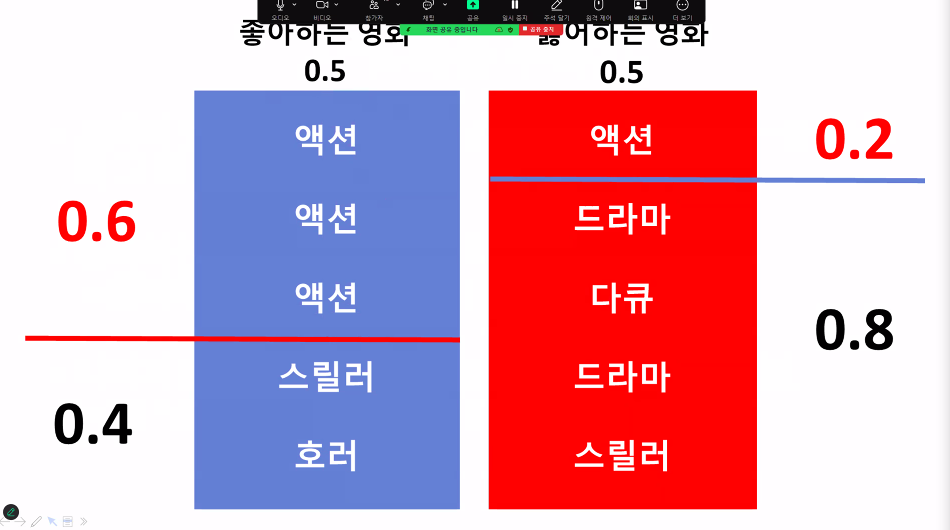

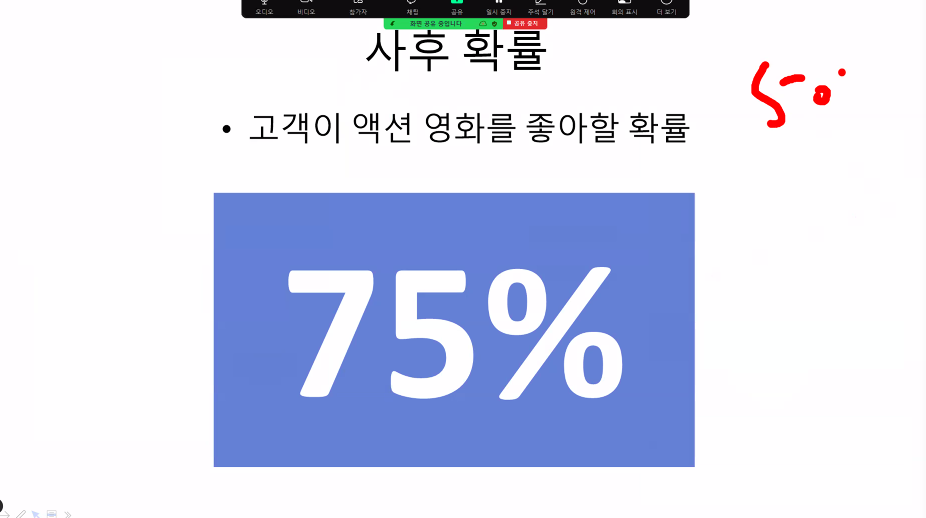

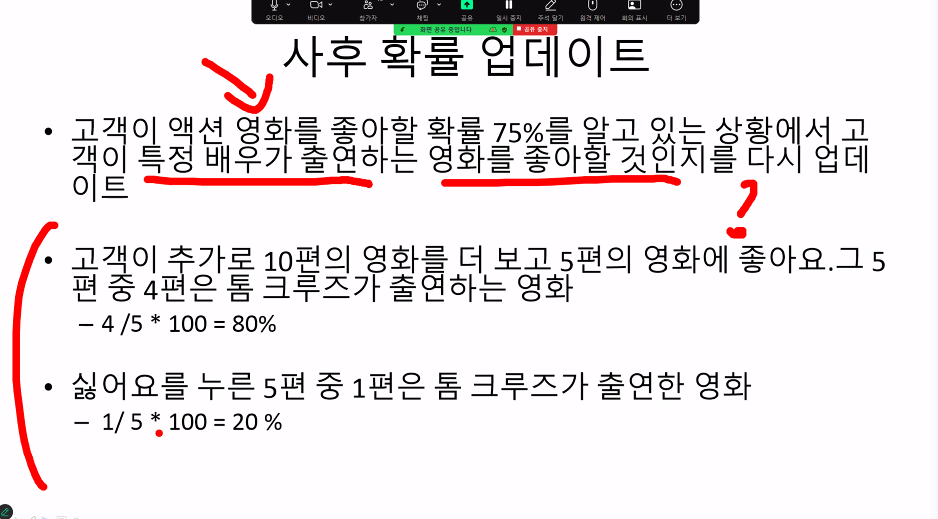

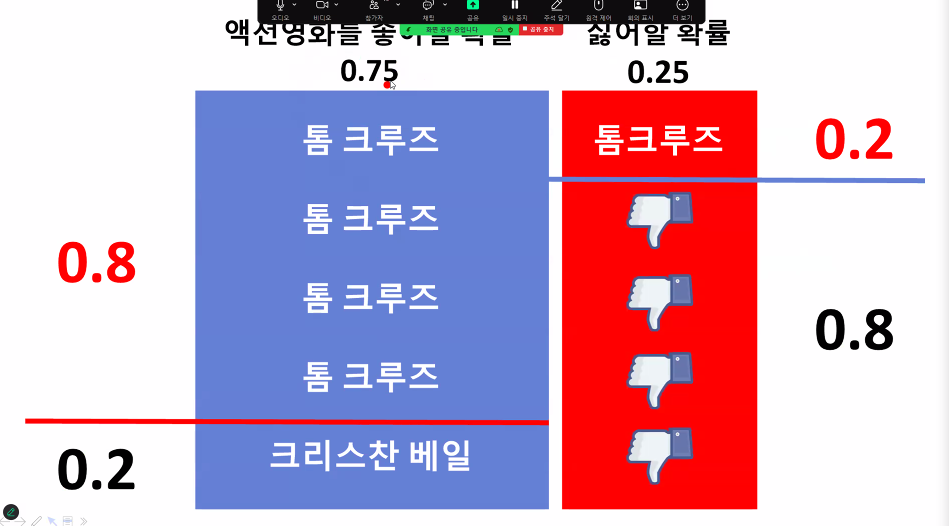

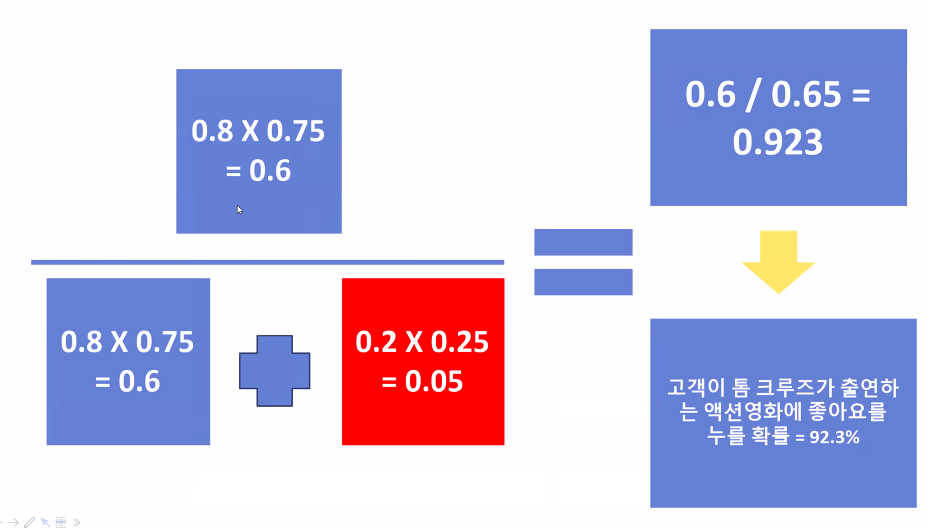

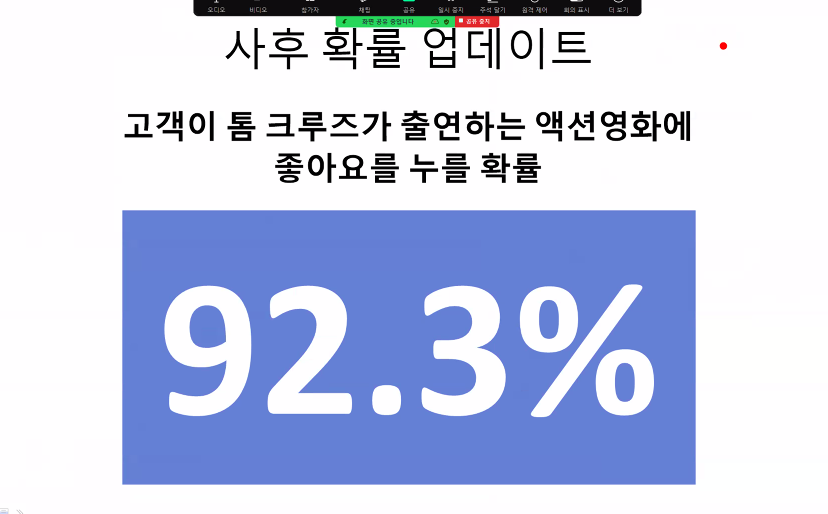

# 나이브베이즈를 이용해서 분류분석하기
* 독립변수가 수치형으로 이루어진 경우 : GaussianNB
* 문자가 많은 경우 : MultinominalNB

In [31]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [36]:
# 독립변수에 수치형 자료가 많으므로 GaussianNB 이용해서 분석
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       151
           1       0.97      0.98      0.98       149

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



* https://konlpy.org/ko/latest/index.html